In [2]:
import cv2, os

In [3]:
data_set = 'dataset'
categories = os.listdir(data_set)
labels=[i for i in range (len(categories))]

label_dict = dict(zip(categories,labels))

In [4]:
print(label_dict)
print(categories)
print(labels)

{'with mask': 0, 'without mask': 1}
['with mask', 'without mask']
[0, 1]


In [5]:
data=[]
target=[]



for category in categories:
    folder_path=os.path.join(data_set,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            resized=cv2.resize(gray,(50,50))
            data.append(resized)
            target.append(label_dict[category])
            
        except Exception as e:
            print('Exception:',e)
        

In [6]:
import numpy as np

data=np.array(data)/255
data=np.reshape(data,(data.shape[0],50,50,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

Using TensorFlow backend.


In [7]:
np.save('data',data)
np.save('target',new_target)

# TRAINING OUR MODEL


In [8]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [10]:
model=Sequential()

model.add(Conv2D(100,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(300, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


In [11]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [12]:
checkpoint = ModelCheckpoint('model-{epoch:02d}.model',monitor='val_loss',verbose=0,mode='auto')
history = model.fit(train_data, train_target, epochs = 20, callbacks=[checkpoint], validation_data=(test_data, test_target))

Instructions for updating:
Use tf.cast instead.
Train on 1242 samples, validate on 138 samples
Epoch 1/20
1242/1242 [==============================] - 24s 20ms/step - loss: 0.6704 - accuracy: 0.6167 - val_loss: 0.6027 - val_accuracy: 0.6667
Epoch 2/20
1242/1242 [==============================] - 26s 21ms/step - loss: 0.4210 - accuracy: 0.8003 - val_loss: 0.2765 - val_accuracy: 0.8986
Epoch 3/20
1242/1242 [==============================] - 26s 21ms/step - loss: 0.2060 - accuracy: 0.9195 - val_loss: 0.1664 - val_accuracy: 0.9710
Epoch 4/20
1242/1242 [==============================] - 27s 21ms/step - loss: 0.1130 - accuracy: 0.9549 - val_loss: 0.2215 - val_accuracy: 0.9203
Epoch 5/20
1242/1242 [==============================] - 27s 22ms/step - loss: 0.0795 - accuracy: 0.9702 - val_loss: 0.1722 - val_accuracy: 0.9420
Epoch 6/20
1242/1242 [==============================] - 26s 21ms/step - loss: 0.0589 - accuracy: 0.9799 - val_loss: 0.1518 - val_accuracy: 0.9565
Epoch 7/20
1242/1242 [=======

In [13]:
 from matplotlib import pyplot as plt


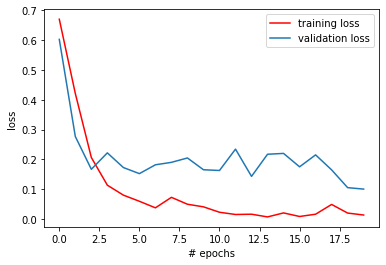

In [14]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

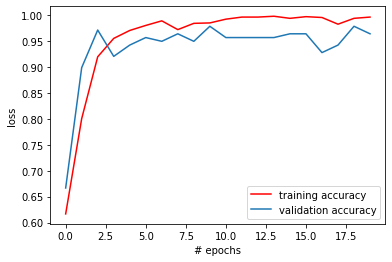

In [15]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [16]:
print(model.evaluate(test_data,test_target))

138/138 [==============================] - 1s 6ms/step
[0.09977561856309573, 0.9637681245803833]


In [17]:
print(data)

[[[[0.20392157]
   [0.25490196]
   [0.19215686]
   ...
   [0.1372549 ]
   [0.28235294]
   [0.17647059]]

  [[0.20392157]
   [0.14901961]
   [0.1254902 ]
   ...
   [0.16862745]
   [0.3372549 ]
   [0.00784314]]

  [[0.24705882]
   [0.10980392]
   [0.20392157]
   ...
   [0.01960784]
   [0.22745098]
   [0.05882353]]

  ...

  [[0.29019608]
   [0.30588235]
   [0.29411765]
   ...
   [0.10980392]
   [0.01176471]
   [0.02352941]]

  [[0.31372549]
   [0.29803922]
   [0.32156863]
   ...
   [0.16862745]
   [0.00392157]
   [0.05098039]]

  [[0.24313725]
   [0.22352941]
   [0.35686275]
   ...
   [0.03529412]
   [0.04705882]
   [0.04313725]]]


 [[[0.98039216]
   [0.98431373]
   [0.98431373]
   ...
   [0.98823529]
   [0.98823529]
   [0.98431373]]

  [[0.98431373]
   [0.98431373]
   [0.98823529]
   ...
   [0.98823529]
   [0.98823529]
   [0.98823529]]

  [[0.98431373]
   [0.98431373]
   [0.98823529]
   ...
   [0.98823529]
   [0.98823529]
   [0.98823529]]

  ...

  [[1.        ]
   [1.        ]
   [1. 

In [18]:
print(max(history.history['val_accuracy']))

0.97826087474823


# FACE MASK DETECTION CODE


In [19]:
from keras.models import load_model
import cv2
import numpy as np

In [20]:
model = load_model('model-18.model')

face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

source=cv2.VideoCapture(0)
print ("Video is ON")

labels_dict={0:'with_mask',1:'without_mask'}
color_dict={0:(0,255,0),1:(0,0,255)}

Video is ON


In [21]:
while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.1,10)  

    for x,y,w,h in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(50,50))
        normalized=resized/255
        reshaped=np.reshape(normalized,(1,50,50,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()